## Question 4

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Optimization Problem

This is a convex optimization problem since the objective function (sum of squares) is convex, all inequality contrains are affine and hence convex, and all equality constraints are affine. The formulation is <br>
min. $\frac{1}{T+1} \sum_{t=1}^{T+1}\left(n_{t}-n^{\mathrm{des}}\right)^{2}+\lambda \frac{1}{T-1} \sum_{t=1}^{T-1}\left(c_{t+1}-c_{t}\right)^{2}$ <br>
s.t. $c \geq 0, d \geq 0, p \geq 0, n \geq 0, u \geq 0$ <br>
&emsp; &ensp; $n_1 = 0, u_1 = 0$ <br>
&emsp; &ensp; $u_{t+1} = u_t - p_t + c_t, t=1 \ldots T$ <br>
&emsp; &ensp; $n_{t+1} = (1+r)n_t + p_t - d_t, t=1 \ldots T$ <br>
&emsp; &ensp; $c \leq c_{max}, p \leq p_{max}$ <br>
&emsp; &ensp; $p_t = \gamma^{call}u_t, d_t = \gamma^{dist}n_t$ <br>
&emsp; &ensp; $1^Tc \leq B$

### Implementation

In [2]:
# problem data

gam_call, gam_dist = 0.23, 0.15
cmax, pmax = 4, 3
B = 85
ndes = 15
lam = 5
T = 40
r = 0.04

In [3]:
# defining variables

c, p, d = cp.Variable(T, nonneg=True), cp.Variable(T, nonneg=True), cp.Variable(T, nonneg=True)
n, u = cp.Variable(T+1, nonneg=True), cp.Variable(T+1, nonneg=True)

In [4]:
# defining constraints

cons = [c<=cmax, p<=pmax, cp.sum(c)<=B]
cons += [n[0]==0, u[0]==0]

for t in range(T):
    cons += [n[t+1] == (1+r)*n[t]+p[t]-d[t]]
    cons += [u[t+1] == u[t]-p[t]+c[t]]
    cons += [p[t] == gam_call*u[t], d[t] == gam_dist*n[t]]

In [5]:
# defining the objective function

term1, term2 = 0, 0

for t in range(T+1):
    term1 += cp.square(n[t]-ndes)
    
for t in range(T-1):
    term2 += cp.square(c[t+1]-c[t])
    
obj = cp.Minimize((1/(T+1))*term1 + (lam/(T-1))*term2)

In [6]:
# solve the problem

prob_a = cp.Problem(obj, cons)
prob_a.solve();

We plot the values of the variables against time.

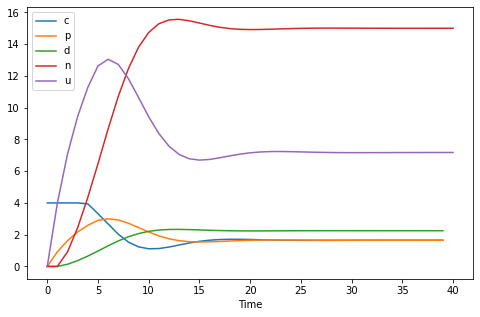

In [7]:
plt.plot(c.value, label='c');
plt.plot(p.value, label='p');
plt.plot(d.value, label='d');
plt.plot(n.value, label='n');
plt.plot(u.value, label='u');
plt.xlabel("Time")
plt.legend();

fig = plt.gcf();
fig.set_size_inches((8,5));

In [8]:
print("The optimal RMS tracking error is {}".format(np.sqrt((1/(T+1))*term1.value)))    

The optimal RMS tracking error is 5.083869068895278


Next we solve the constant commitment based on steady state.

In [9]:
# problem data and constraints

c_ss = (gam_dist - r)*ndes
cons_b = cons + [c == c_ss]

In [10]:
# solve the problem

prob_b = cp.Problem(obj, cons_b)
prob_b.solve();

Same plots for this case.

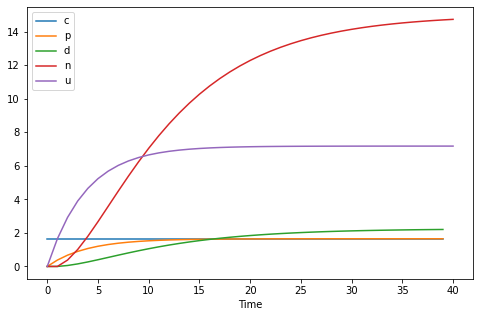

In [11]:
plt.plot(c.value, label='c');
plt.plot(p.value, label='p');
plt.plot(d.value, label='d');
plt.plot(n.value, label='n');
plt.plot(u.value, label='u');
plt.xlabel("Time")
plt.legend();

fig = plt.gcf();
fig.set_size_inches((8,5));

In [12]:
print("The optimal RMS tracking error is {}".format(np.sqrt((1/(T+1))*term1.value)))    

The optimal RMS tracking error is 6.856700870342915


The NAV attained in the optimal case goes higher than when the investor makes constant commitments. Alternatively, the desired level of NAV is attained quicker in the case of optimal commitments. This indicates that with constant commitments the investor will have to wait longer to reach her desired level of NAV.